In [9]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import os, sys
sys.path.append(os.path.join(os.getcwd(), '../sympde'))

from data.pdes import PDEs
from viz.plot_pde_data import plot_1ds
from misc.utils import load_obj


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
math_dir = os.path.join('../data/mathematica/processed')

### Mathematica data

In [11]:
data = np.load(os.path.join(math_dir, 'data_array.npy'))
labels = np.load(os.path.join(math_dir, 'labels_array.npy'))
sym = np.load(os.path.join(math_dir, 'sym_array.npy'))
data.shape, labels.shape, sym.shape

((5000, 62, 64), (5000, 1), (25, 15))

In [12]:
# plt.hist(labels.reshape(-1))
# plt.show()

# for s in sym:
#     plt.hist(s, alpha = 0.5)
# plt.show()

### SymPDE data

In [13]:
data_dir = '../data/test'

In [14]:
pdes = PDEs()

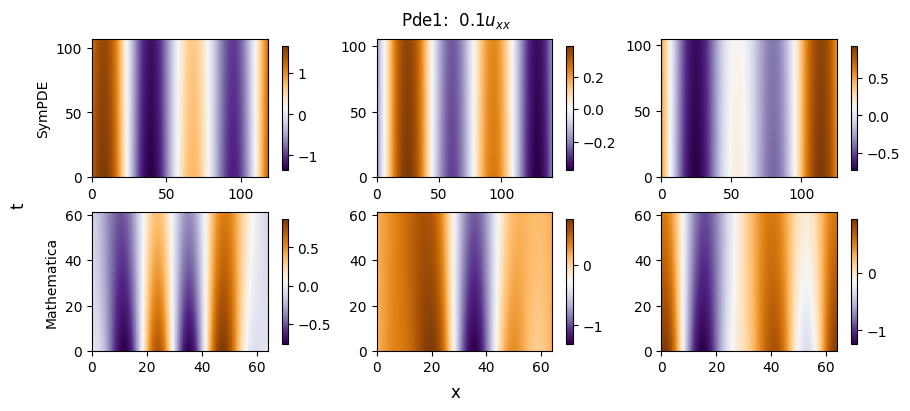

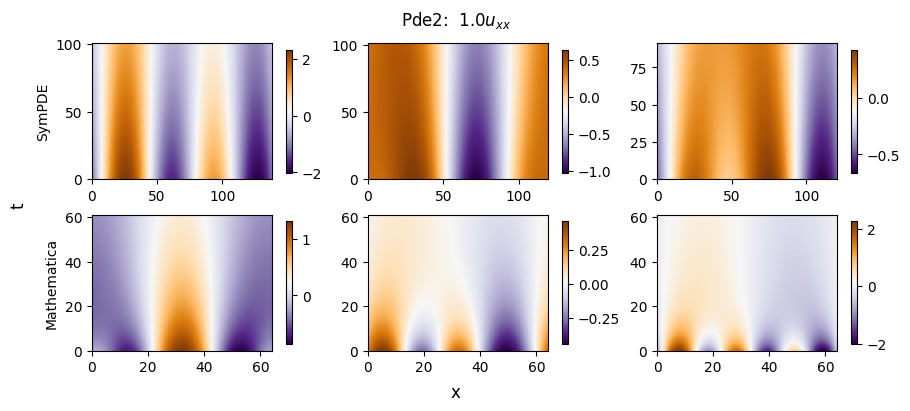

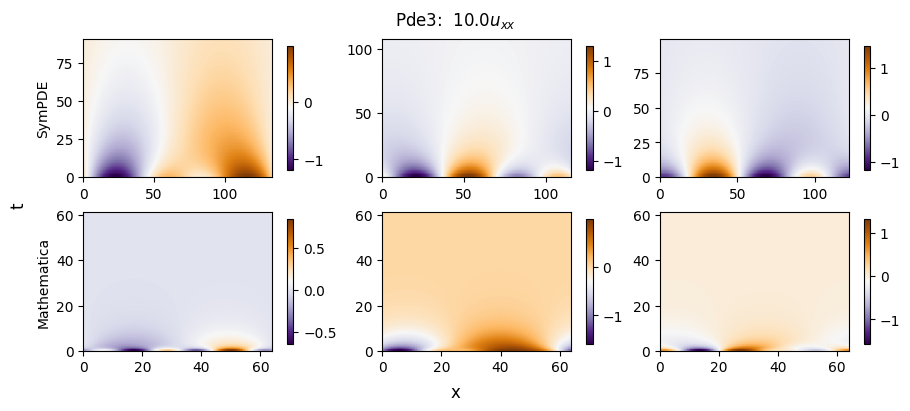

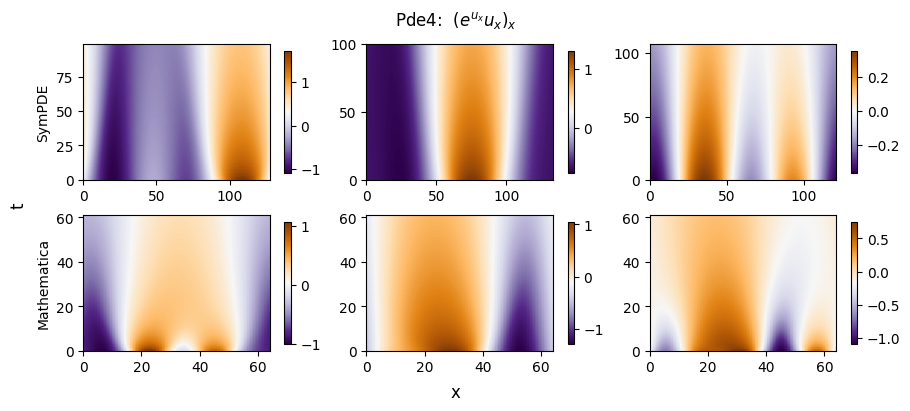

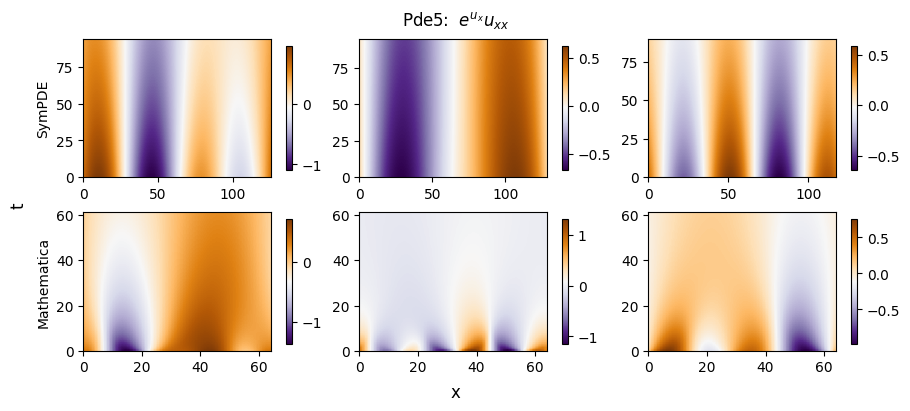

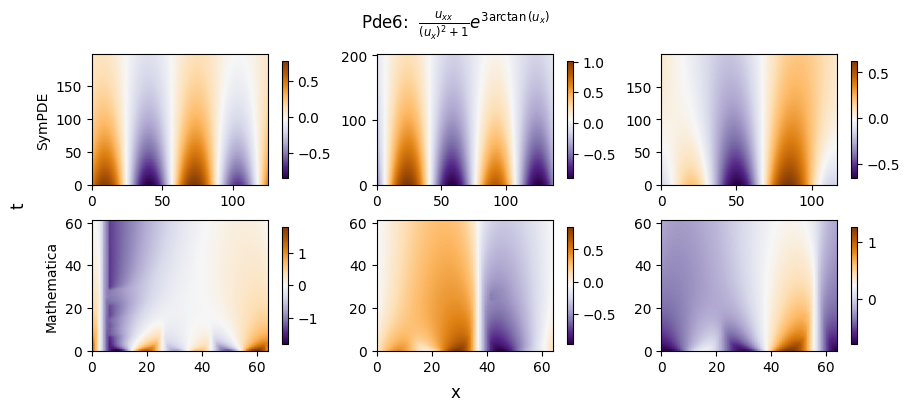

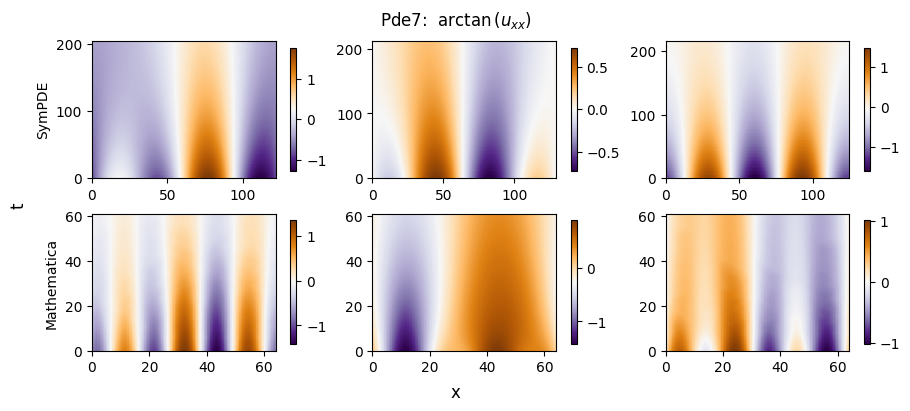

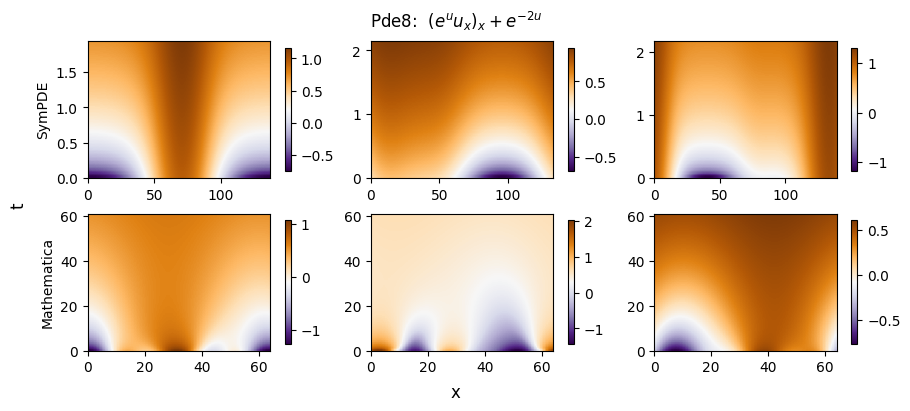

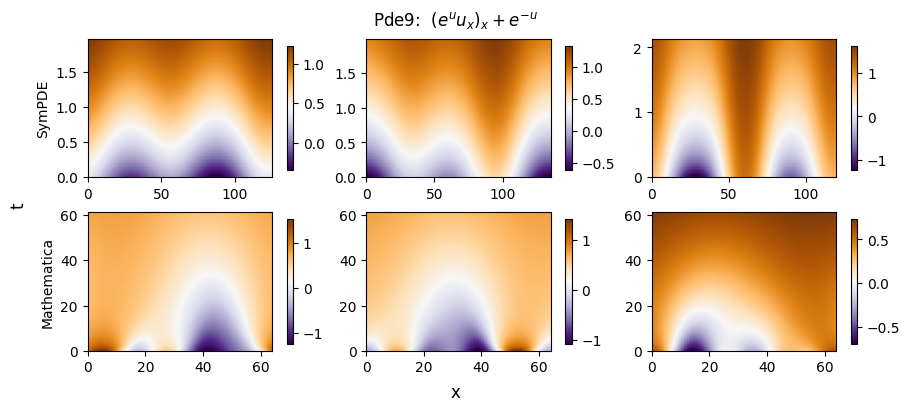

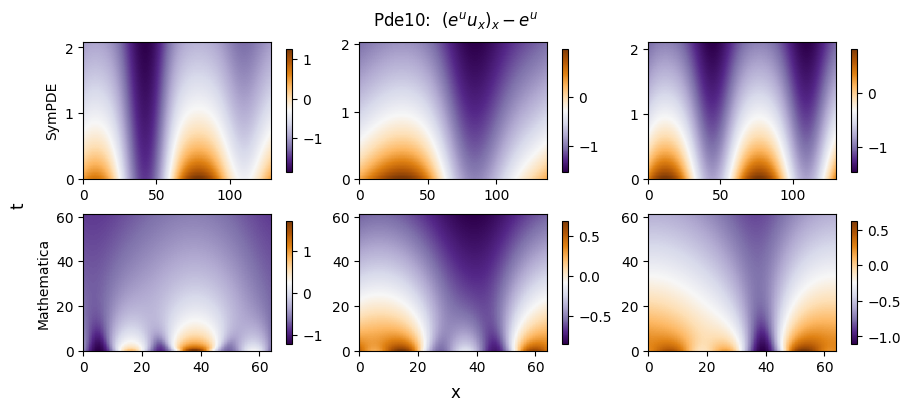

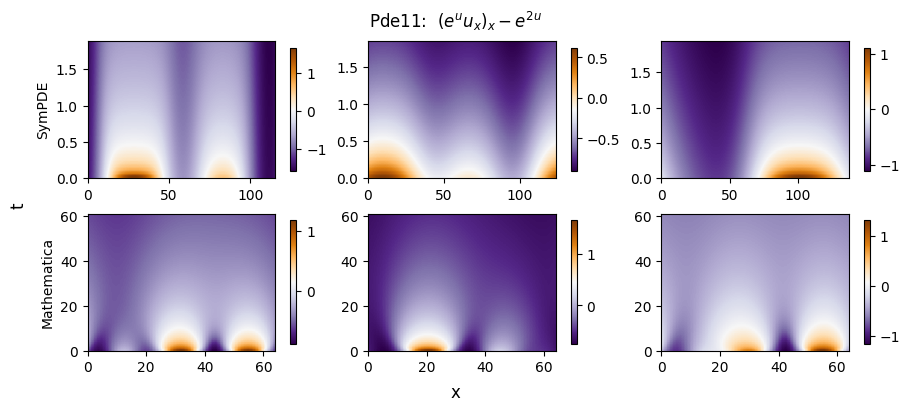

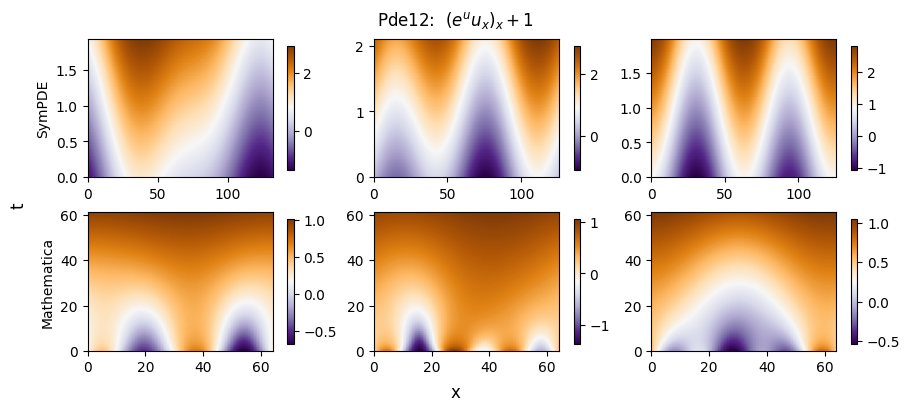

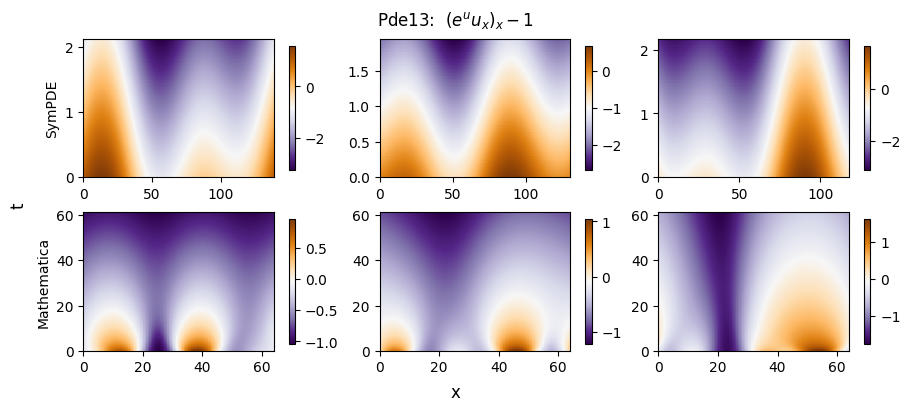

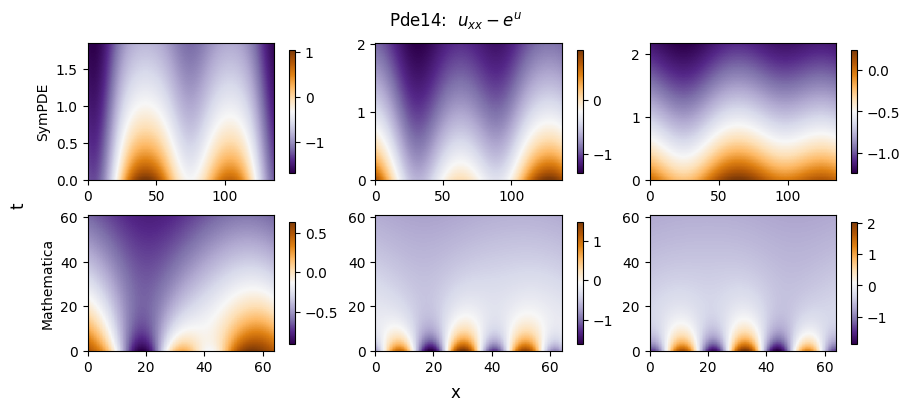

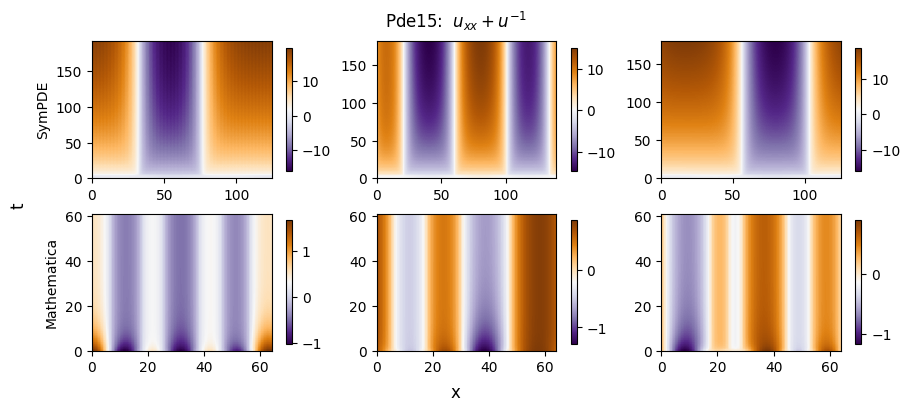

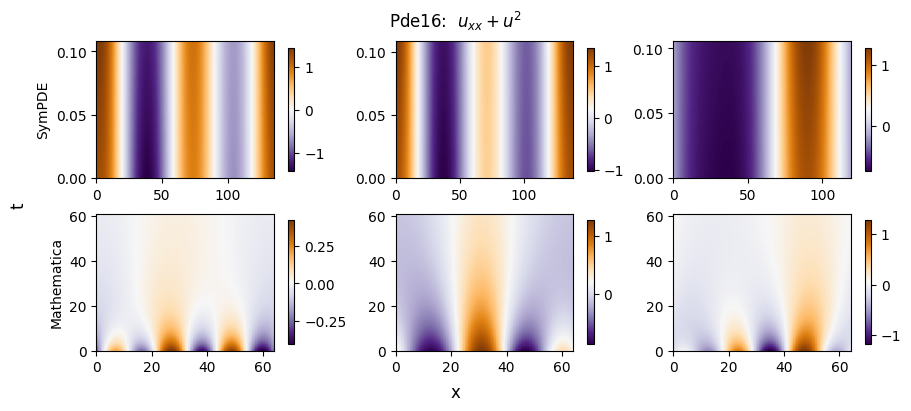

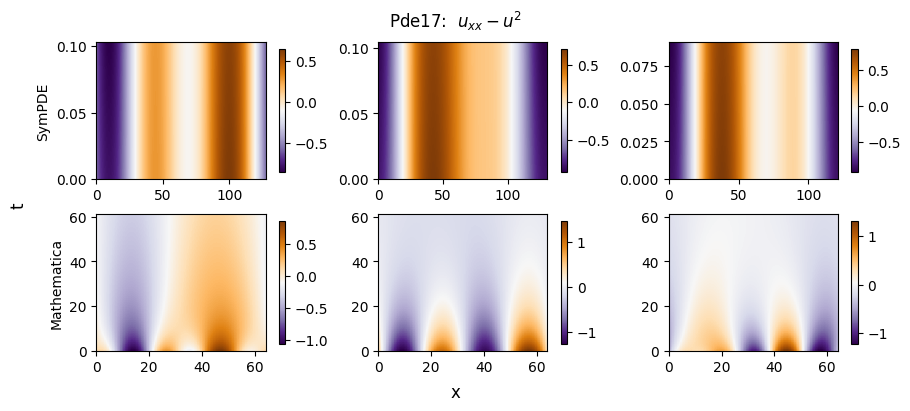

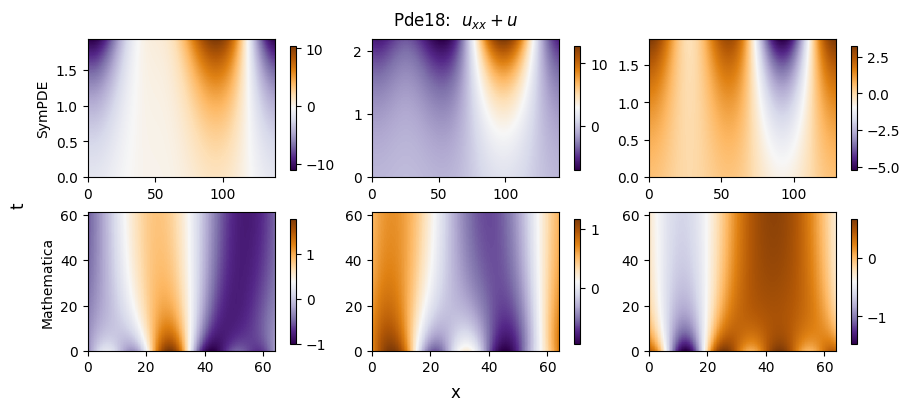

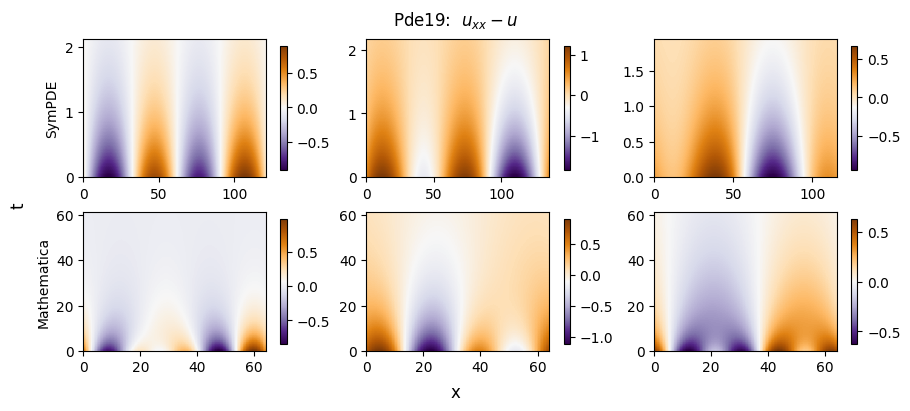

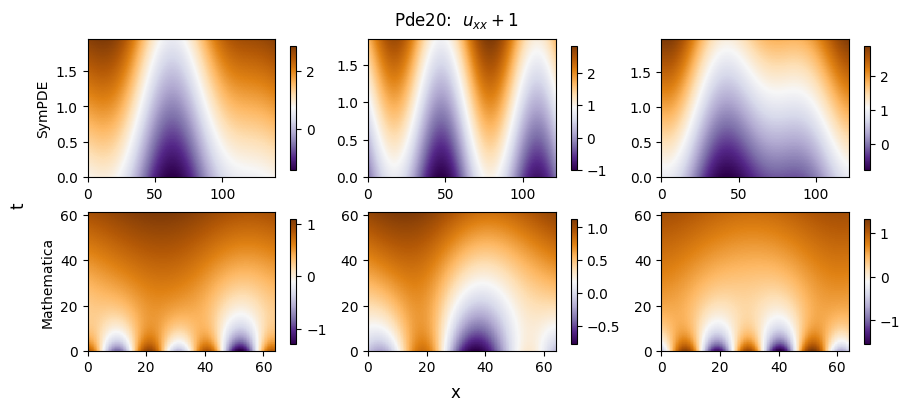

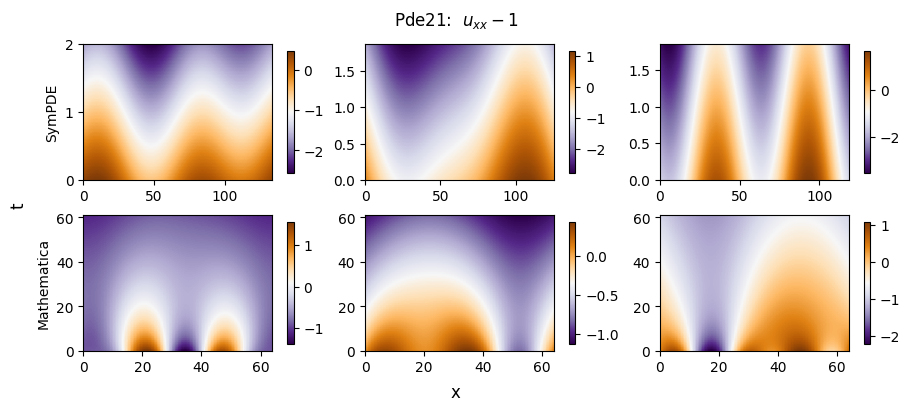

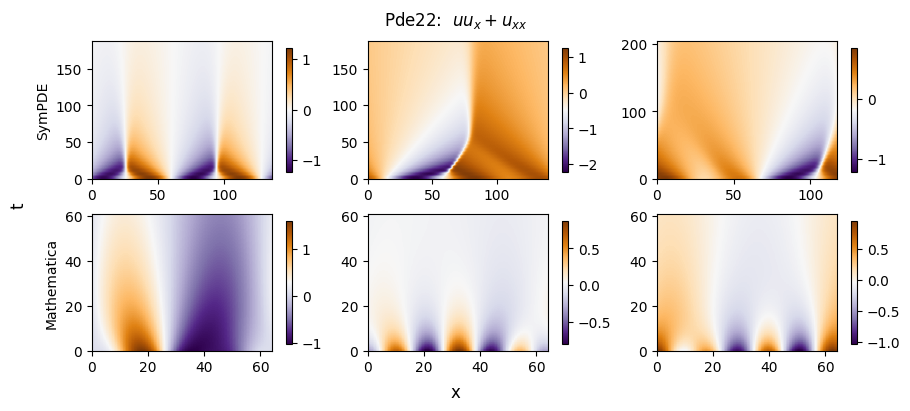

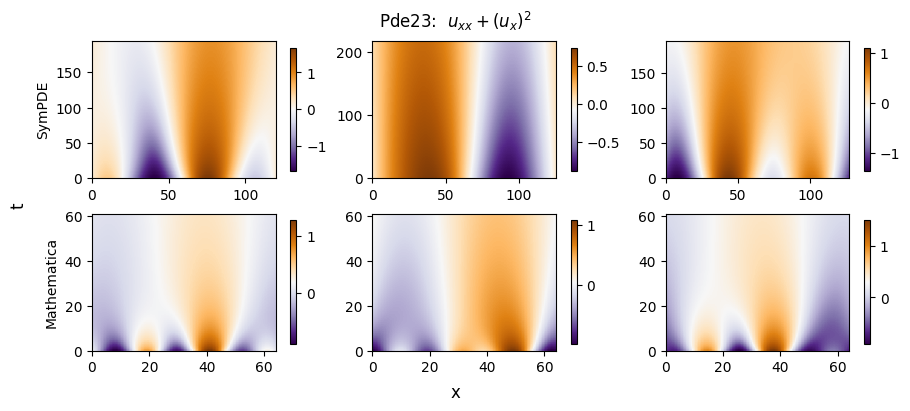

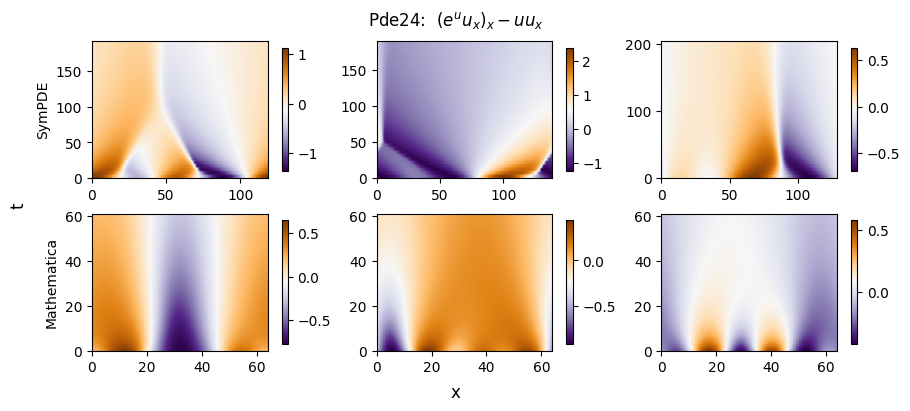

In [17]:
for i, (pde_name, pde_str) in enumerate(pdes.items()):
    l = 3

    us, dxs, dts = load_obj(os.path.join(data_dir, 'train', f'{pde_name}'))
    # plot_1ds(us[:l], dxs[:l], dts[:l], nrows = 2, ncols = 3, title = rf'{pde_name}:  {pde_str}', figsize = (3,2))

    pde_idx = pde_name[3:]
    if not str.isdigit(pde_idx):
        continue

    us_math = data[np.where(labels == int(pde_idx))[0]]
    dxs_math = np.ones((us_math.shape[0]))
    dts_math = np.ones((us_math.shape[0]))

    # plot_1ds(us_math[:l], dxs_math[:l], dts_math[:l], nrows = 1, ncols = 3, title = rf'{pde_name}:  {pde_str}', figsize = (3,2))

    us_plot = [u for u in us[:l]] + [u for u in us_math[:l]]
    dxs_plot = np.concatenate((dxs[:l], dxs_math[:l]), axis = 0)
    dts_plot = np.concatenate((dts[:l], dts_math[:l]), axis = 0)
    
    plot_1ds(us_plot, dxs_plot, dts_plot, nrows = 2, ncols = 3, title = rf'{pde_name}:  {pde_str}', figsize = (3,2))
